In [1]:
import json, re
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

def plotPretext(path,title,start,end=None):
    txt = open(path).read()
    txtL = re.findall("\{(.*)\}", txt) # epoch split
    plt.title(title, fontsize=16)
    plt.xlabel("epochs", fontsize=16)
    plt.ylabel("loss", fontsize=16)
    train_loss_L = [ round(float(json.loads("{"+txtL[i]+"}")["train_loss"]),5) for i in range(len(txtL)) ]
    plt.plot(train_loss_L[start:end])
    plt.grid('on')
    plt.show()
    n = len(train_loss_L)
    print(f"min(zip(train_loss_L,range(n)))={min(zip(train_loss_L,range(n)))}")
    return train_loss_L

def plotFinetune(path,title,start=0,end=None):
    txt = open(path).read()
    txtL = re.findall("\{(.*)\}", txt) # epoch split
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    #
    ax[0].set_title(title, fontsize=16)
    ax[0].set_xlabel("epochs", fontsize=16)
    ax[0].set_ylabel("loss", fontsize=16)
    train_loss_L = [ round(float(json.loads("{"+txtL[i]+"}")["train_loss"]),5) for i in range(len(txtL)) ]
    ax[0].plot(train_loss_L[start:end])
    val_loss_L   = [ round(float(json.loads("{"+txtL[i]+"}")["val_loss"]),5) for i in range(len(txtL)) ]
    ax[0].plot(val_loss_L[start:end])
    n = len(train_loss_L)
    ax[0].grid('on')
    print(f"min(zip(val_loss_L,range(n)))={min(zip(val_loss_L,range(n)))}")
    #
    ax[1].set_title(title, fontsize=16)
    ax[1].set_xlabel("epochs", fontsize=16)
    ax[1].set_ylabel("acc", fontsize=16)
    train_acc_L = [ round(float(json.loads("{"+txtL[i]+"}")["train_class_acc"]),5) for i in range(len(txtL)) ]
    ax[1].plot(train_acc_L[start:end])
    val_acc_L = [ round(float(json.loads("{"+txtL[i]+"}")["val_acc1"])/100,5) for i in range(len(txtL)) ]
    ax[1].plot(val_acc_L[start:end])
    ax[1].grid('on')
    print(f"max(zip(val_acc_L,range(n)))={max(zip(val_acc_L,range(n)))}")
    plt.show()
    return val_loss_L, val_acc_L

def getBest(evalPath, printAll=False):
    txt = open(evalPath,"r").read()
    epL = re.findall("---.*checkpoint-([0-9]*).pth---", txt)
    accL = re.findall("Acc@1 ([0-9,.]*) .* loss [0-9,.]*", txt)
    lossL = re.findall("Acc@1 [0-9,.]* .* loss ([0-9,.]*)", txt)
    print(f"len(epL),len(accL),len(lossL)={(len(epL),len(accL),len(lossL))}")
    Z = list(zip(epL,accL,lossL))
    print(f"max_acc_min_loss={ max(Z,key=lambda tup:float(tup[1])-float(tup[2])) }")
    print(f"min_loss={ min(Z,key=lambda tup:float(tup[2])) }")
    if printAll:
        for tup in Z:
            print(tup)

### PRETEXT

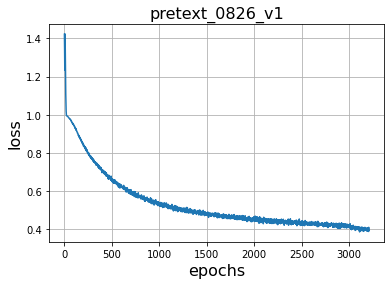

min(zip(train_loss_L,range(n)))=(0.38489, 3109)


In [9]:
trainL = plotPretext("../_exps/pretext_0826_v1/log.txt","pretext_0826_v1",0)

### DOWNSTREAM

min(zip(val_loss_L,range(n)))=(0.0046, 1395)
max(zip(val_acc_L,range(n)))=(1.0, 1753)


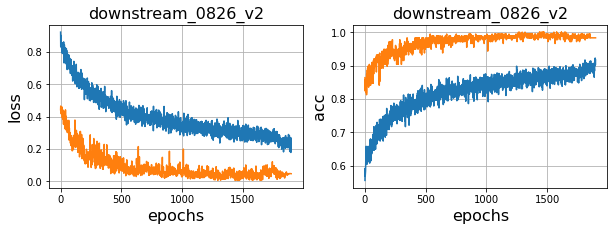

len(epL),len(accL),len(lossL)=(200, 201, 201)
max_acc_min_loss=('1719', '100.000', '0.012')
min_loss=('1689', '99.432', '0.008')


In [4]:
valLossL, valAccL = plotFinetune("../_exps/downstream_0826_v2/log.txt", "downstream_0826_v2", 100) # 0.9 x 2000
getBest("../_exps/downstream_0826_v2/eval.txt", printAll=0)

min(zip(val_loss_L,range(n)))=(0.24557, 196)
max(zip(val_acc_L,range(n)))=(0.92045, 191)


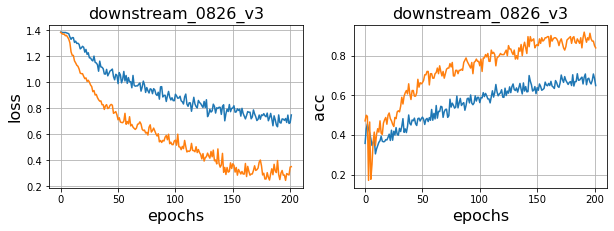

In [10]:
valLossL, valAccL = plotFinetune("../_exps/downstream_0826_v3/log.txt", "downstream_0826_v3", 0) # 0.9 x 2000
#getBest("../_exps/downstream_0826_v3/eval.txt", printAll=0)